<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/multiple_linear_regression_linear_dependencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [172]:
#
# Load data
#

url_dataset = 'https://raw.githubusercontent.com/BojanKomazec/tensorflow-demo-notebooks/main/data/cars.csv'
df_dataset = pd.read_csv(url_dataset)

In [173]:
#
# Exploratory Analasys
#

#
# Show dataframe with dataset in order to identify features and labels.
#
# By looking the columns we can identify:
# - Input features (predictors): Volume and Weight
# - Output labels (): CO2
display(df_dataset)

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


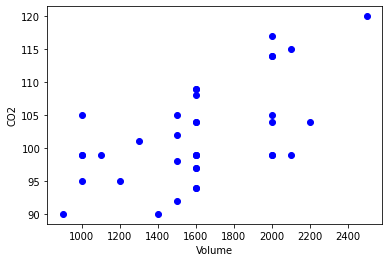

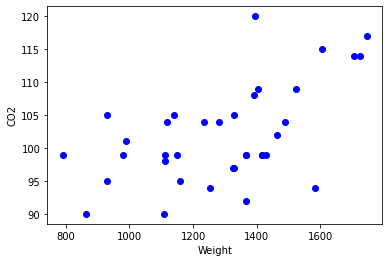

In [174]:
#
# Exploratory Analasys
#

#
# To make sure we can apply a hypothesis which is a linear combination of
# predictors (h(x1, x2) = b + k1 * x1 + k2 * x2) we need to verify if 
# y has linear dependency on predictors.
#

# Verify that there is a linear relationship between the CO2 and Volume
# by drawing a plot CO2 = f(Volume)

plt.plot(df_dataset['Volume'], df_dataset['CO2'], 'bo')
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.show()

# Plot shows that CO2 emissions increase with car engine's Volume

# Verify that there is a linear relationship between the CO2 and Weight
# by drawing a plot CO2 = f(Weight)

plt.plot(df_dataset['Weight'], df_dataset['CO2'], 'bo')
plt.xlabel('Weight')
plt.ylabel('CO2')
plt.show()

# Plot shows that CO2 emissions increase with car's Weight

In [175]:
#
# Exploratory Analasys
#

# Check min and max values for each feature.
# If features are on different scales we'll need to normalise them.

print(f'Weight: min = {df_dataset["Weight"].min()}, max = {df_dataset["Weight"].max()}')
print(f'Volume: min = {df_dataset["Volume"].min()}, max = {df_dataset["Volume"].max()}')
print(f'CO2: min = {df_dataset["CO2"].min()}, max = {df_dataset["CO2"].max()}')

Weight: min = 790, max = 1746
Volume: min = 900, max = 2500
CO2: min = 90, max = 120


In [176]:
#
# Create a training and test datasets
#

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')

dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

#
# Split training and test datasets to features and labels.
# This is useful as features might be normalized.
#

train_features = dataset_train[['Volume', 'Weight']].copy()
test_features = dataset_test[['Volume', 'Weight']].copy()

print(f'train_features.shape = {train_features.shape}')
print(f'test_features.shape = {test_features.shape}')

train_labels = dataset_train['CO2'].copy()
test_labels = dataset_test['CO2'].copy()

print(f'train_labels.shape = {train_labels.shape}') # should be 1D (vector)
print(f'test_labels.shape = {test_labels.shape}') # should be 1D (vector)

dataset_train.shape = (29, 5)
dataset_test.shape = (7, 5)
train_features.shape = (29, 2)
test_features.shape = (7, 2)
train_labels.shape = (29,)
test_labels.shape = (7,)


In [177]:
#dataset_train['Volume']

In [178]:
#dataset_train['Weight']

In [179]:
#
# Feature Normalization (Standardization)
# It rescales data to have mean = 0 and standard deviation of 1 (unit variance).
#

print(f'train_features.mean() = \n{train_features.mean()}')
print(f'train_features.std() = \n{train_features.std()}')

train_features_normalized = (train_features - train_features.mean()) / train_features.std()
print(f'train_features_normalized.shape = {train_features_normalized.shape}')
print(train_features_normalized)

test_features_normalized = (test_features - test_features.mean()) / test_features.std()
print(f'test_features_normalized.shape = {test_features_normalized.shape}')
print(test_features_normalized)

train_features.mean() = 
Volume    1631.034483
Weight    1325.413793
dtype: float64
train_features.std() = 
Volume    382.756402
Weight    231.646053
dtype: float64
train_features_normalized.shape = (29, 2)
      Volume    Weight
31  0.963970  1.815642
20 -0.081082  1.116299
16 -0.081082  0.170891
30  1.225232  1.206954
22  1.225232  0.170891
15 -0.081082  0.019798
10 -1.387395 -1.491127
2  -1.648658 -1.711291
11 -0.864870 -1.447958
29  0.963970  1.638647
27  0.963970  1.724986
35  2.270283  0.300399
33 -0.081082  0.278814
28 -0.081082  0.852966
32 -0.081082 -0.390310
8  -0.342344 -0.921293
13 -0.081082 -0.316922
5  -1.648658 -1.711291
17  1.486495 -0.196048
14 -0.081082  0.002531
7  -0.342344  0.170891
26  0.963970  0.710507
1  -1.126133 -0.714080
12 -1.648658 -0.921293
25 -0.342344  0.602584
24  0.963970  0.386737
6  -0.603607 -0.934243
23 -0.081082  0.386737
4  -0.342344 -0.800419
test_features_normalized.shape = (7, 2)
      Volume    Weight
0  -1.215677 -1.439785
3  -1.445670 -1.1

In [180]:
#
# Feature Normalization (min-max scaling)
#

#print(f'train_features.min() = \n{train_features.min()}')
#print(f'train_features.max() = \n{train_features.max()}')

#train_features_normalized = (train_features - train_features.min())/(train_features.max() - train_features.min())
#print(f'train_features_normalized.shape = {train_features_normalized.shape}')
#print(train_features_normalized)

#print(f'test_features.min() = \n{test_features.min()}')
#print(f'test_features.max() = \n{test_features.max()}')

#test_features_normalized = (test_features - test_features.min())/(test_features.max() - test_features.min())
#print(f'test_features_normalized.shape = {test_features_normalized.shape}')
#print(test_features_normalized)

In [181]:
#
# Build a model with a single neuron which takes a single feature as an input
# (This is a neural network with no hidden layers and no activations)
#

FEATURES_COUNT = train_features.shape[1]
print(f'FEATURES_COUNT = {FEATURES_COUNT}')

model = tf.keras.Sequential([
    layers.Dense(input_shape=(FEATURES_COUNT,), units=1)
])

model.summary()

FEATURES_COUNT = 2
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [182]:
#
# Compile the model
#

LEARNING_RATE = 0.01
OPTIMIZER=tf.optimizers.SGD(learning_rate=LEARNING_RATE)
LOSS = tf.losses.MeanAbsoluteError()

model.compile(
    optimizer=OPTIMIZER,
    loss=LOSS,
)

In [183]:
#
# Train the model
#
%%time

# Large number of epochs seems to be required in order to get loss function
# convergence (an "elbow" in the diagram which shows loss vs number of epochs).
EPOCHS = 15000

# Input data is a tensor. 
# First dimension is batch size (number of samples).
# Second dimension is number of features.
# In our case train_features dimension is (29, 2).
# When we specified input_shape=(2,) we omitted batch size as Keras deducts this
# value from the number of rows. 

history = model.fit(
    train_features_normalized, train_labels,
    epochs=EPOCHS,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 4min 44s, sys: 9.66 s, total: 4min 54s
Wall time: 4min 59s


In [184]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


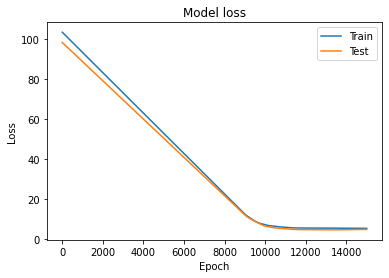

In [185]:
#
# Plot how loss changes over each epoch.
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [186]:
#
# Perform prediction on unseen data
#

predictions = model.predict(test_features_normalized)
print(predictions.shape)

# append a predictions column to the test 
df_predictions = test_features.assign(CO2=predictions)
display(df_predictions)

(7, 1)


,Volume,Weight,CO2
0,1000,790,95.237572
3,900,865,95.610474
9,1600,1150,102.618172
18,1600,1119,102.250076
19,2000,1328,106.802383
21,2000,1428,107.989792
34,1600,1405,105.646072


In [187]:
#
# Print the values of learned and original model parameters.
#

# Check out the weights' values of the trained model
for layer in model.layers: print(layer.get_config(), layer.get_weights())

weights = model.layers[0].get_weights()
print(f'weights = {weights}')

coefficients = weights[0]
biases = weights[1]

coefficient1 = coefficients[0]
coefficient2 = coefficients[1]
bias = biases[0]

print(f'\n\nHypothesis: CO2(Volume, Weight) = {bias} + {coefficient1} * Volume + {coefficient2} * Weight')

{'name': 'dense_9', 'trainable': True, 'batch_input_shape': (None, 2), 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[2.2507374],
       [3.010208 ]], dtype=float32), array([102.30779], dtype=float32)]
weights = [array([[2.2507374],
       [3.010208 ]], dtype=float32), array([102.30779], dtype=float32)]


Hypothesis: CO2(Volume, Weight) = 102.30779266357422 + [2.2507374] * Volume + [3.010208] * Weight
